In [80]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
#data from https://github.com/zygmuntz/goodbooks-10k
ratings = pd.read_csv( 'data/ratings.csv' )
to_read = pd.read_csv( 'data/to_read.csv' )
books = pd.read_csv( 'data/books.csv' )
tags = pd.read_csv( 'data/tags.csv' )
book_tags = pd.read_csv( 'data/book_tags.csv')

pd.set_option("display.precision", 2)

In [81]:
books.head(2)
books.columns.values

array(['book_id', 'goodreads_book_id', 'best_book_id', 'work_id',
       'books_count', 'isbn', 'isbn13', 'authors',
       'original_publication_year', 'original_title', 'title',
       'language_code', 'average_rating', 'ratings_count',
       'work_ratings_count', 'work_text_reviews_count', 'ratings_1',
       'ratings_2', 'ratings_3', 'ratings_4', 'ratings_5', 'image_url',
       'small_image_url'], dtype=object)

In [82]:
print ('books-->', books.shape , 'ratings-->' ,ratings.shape)
ratings.describe()
#book_tags.tail()
#483452 of 5976479 have ratings less than 3

books--> (10000, 23) ratings--> (5976479, 3)


,user_id,book_id,rating
count,5.98e+06,5.98e+06,5.98e+06
mean,2.62e+04,2.01e+03,3.92e+00
std,1.54e+04,2.47e+03,9.91e-01
min,1.00e+00,1.00e+00,1.00e+00
25%,1.28e+04,1.98e+02,3.00e+00
50%,2.59e+04,8.85e+02,4.00e+00
75%,3.95e+04,2.97e+03,5.00e+00
max,5.34e+04,1.00e+04,5.00e+00


In [83]:

books.columns.values
books_summary = books[['book_id','title', 'authors', 'original_publication_year','average_rating', 'work_ratings_count','work_text_reviews_count','ratings_5']]
books_summary.describe()

,book_id,original_publication_year,average_rating,work_ratings_count,work_text_reviews_count,ratings_5
count,10000.00,9979.00,10000.00,1.00e+04,10000.00,1.00e+04
mean,5000.50,1981.99,4.00,5.97e+04,2919.96,2.38e+04
std,2886.90,152.58,0.25,1.68e+05,6124.38,7.98e+04
min,1.00,-1750.00,2.47,5.51e+03,3.00,7.54e+02
25%,2500.75,1990.00,3.85,1.54e+04,694.00,5.33e+03
50%,5000.50,2004.00,4.02,2.38e+04,1402.00,8.84e+03
75%,7500.25,2011.00,4.18,4.59e+04,2744.25,1.73e+04
max,10000.00,2017.00,4.82,4.94e+06,155254.00,3.01e+06


In [84]:
#Show distribution of users based on number of books rated
ratings_per_user = ratings.groupby('user_id').user_id.apply(lambda x: len(x))
#.user_id.apply( lambda x: len( x ))
#ratings_per_user.hist(bins=40)
#ratings_per_user.describe()
#ratings['u'].hist(by=df['ser'])
#ratings.columns.values


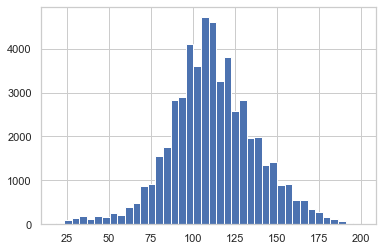

In [85]:
ratings_per_user.sort_values().hist(bins=40)

The dataset contains only users who have rated at least 19 books and average user has rated 111 books. The max user has rated 200 books implying reading and rating a book a month for 16 years :-)

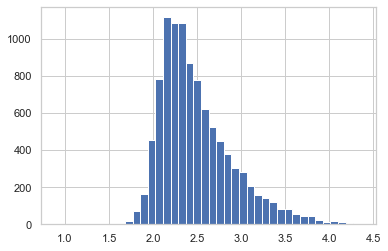

In [86]:
#ratings.boxplot(column='rating')
#ratings.rating.describe()
ratings_per_book = ratings.groupby('book_id').book_id.apply( lambda x: np.log10(len( x )))
#ratings_per_book.head()
#ratings_per_book.plot.density()
ratings_per_book.sort_values().hist(bins=40)

Each book has at least 8 ratings and average book has 248 ratings from a user. Note: User is somebody who has rated at least 19 books.

# The Books with most ratings are:

In [87]:
book_id = ratings_per_book.sort_values(ascending=False).index.tolist()[:10]
popularity_most_ratings = books.iloc[book_id].original_title.to_list()
print (*popularity_most_ratings, sep='\n')

Harry Potter and the Philosopher's Stone
Twilight
The Great Gatsby
To Kill a Mockingbird
The Fault in Our Stars
Harry Potter and the Prisoner of Azkaban
Harry Potter and the Order of the Phoenix
 The Fellowship of the Ring
Harry Potter and the Goblet of Fire
The Catcher in the Rye


# The Books with best average ratings
Note: ratings only from user who has rated at least 19 books.

Ranma ½, Vol. 1 (Ranma ½ (US 2nd), #1)
Wired (Wired, #1)
Crewel (Crewel World, #1)
Funny in Farsi: A Memoir of Growing Up Iranian in America
The Case-Book of Sherlock Holmes
Boys Over Flowers: Hana Yori Dango, Vol. 1 (Boys Over Flowers, #1)
Cloudstreet
Avatar: The Last Airbender (The Promise, #1)
Skeleton Key (Alex Rider, #3)
Dreamland


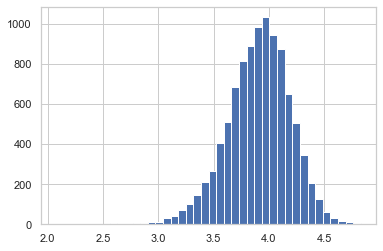

In [88]:

avg_ratings_per_book = ratings.groupby('book_id').rating.mean()
avg_ratings_per_book.hist(bins=40)
high_rated_books = avg_ratings_per_book.sort_values(ascending=False).index.tolist()[:10]
popularity_avg_ratings = books.iloc[high_rated_books].title.to_list()
print (*popularity_avg_ratings, sep='\n')

In [89]:
books_summary_expert_rating= books_summary.merge( avg_ratings_per_book, on = 'book_id')
books_summary_expert_rating["deviation"] = books_summary_expert_rating["rating"]-books_summary_expert_rating["average_rating"]
books_summary_expert_rating["ratings/review_count"] = books_summary_expert_rating["work_ratings_count"]/books_summary_expert_rating["work_text_reviews_count"]
books_summary_expert_rating["5_star_%"] = books_summary_expert_rating["ratings_5"]/books_summary_expert_rating["work_ratings_count"]

books_summary_expert_rating.describe()
#book_classics = books_summary_expert_rating[books_summary_expert_rating['original_publication_year'] < 1940]
#book_modern = books_summary_expert_rating[books_summary_expert_rating['original_publication_year'] >= 1940]
#avg_expert_rating_classics = book_classics['average_rating'].mean()
#avg_expert_rating_modern = book_modern['average_rating'].mean()
#print (avg_expert_rating_classics, avg_expert_rating_modern)
#underrated books
#book_classics.sort_values(by=['original_publication_year'])[240:260]
#book_classics.sort_values(by=['work_text_reviews_count'])


,book_id,original_publication_year,average_rating,work_ratings_count,work_text_reviews_count,ratings_5,rating,deviation,ratings/review_count,5_star_%
count,10000.00,9979.00,10000.00,1.00e+04,10000.00,1.00e+04,10000.00,10000.00,10000.00,10000.00
mean,5000.50,1981.99,4.00,5.97e+04,2919.96,2.38e+04,3.90,-0.10,33.59,0.37
std,2886.90,152.58,0.25,1.68e+05,6124.38,7.98e+04,0.29,0.10,75.06,0.12
min,1.00,-1750.00,2.47,5.51e+03,3.00,7.54e+02,2.08,-0.93,3.65,0.06
25%,2500.75,1990.00,3.85,1.54e+04,694.00,5.33e+03,3.73,-0.15,11.51,0.29
50%,5000.50,2004.00,4.02,2.38e+04,1402.00,8.84e+03,3.92,-0.09,19.72,0.37
75%,7500.25,2011.00,4.18,4.59e+04,2744.25,1.73e+04,4.10,-0.04,35.09,0.45
max,10000.00,2017.00,4.82,4.94e+06,155254.00,3.01e+06,4.83,0.51,3702.00,0.86


# Genres

In [90]:
genres = ["Art", "Biography", "Business", "Chick Lit", "Children's", "Christian", "Classics", "Comics",
"Contemporary", "Cookbooks", "Crime", "Fantasy", "Fiction", "Gay and Lesbian", "Graphic Novels", 
"Historical Fiction", "History", "Horror", "Humor and Comedy", "Manga", "Memoir", "Music", "Mystery", "Nonfiction", 
"Paranormal", "Philosophy", "Poetry", "Psychology", "Religion", "Romance", "Science", "Science Fiction", 
"Self Help", "Suspense", "Spirituality", "Sports", "Thriller", "Travel", "Young Adult"]
genre_lower = list(map(lambda x:x.lower(), genres))
pat = r'+$|'.join(genre_lower)
considered_tags = tags[tags.tag_name.str.match(pat)]
considered_tags_id = considered_tags.tag_id.tolist()
considered_book_tags = book_tags[book_tags.tag_id.isin(considered_tags_id)]

#considered_book_tags
#popular_tags_id = genres_count.sort_values(ascending=False).index.tolist()[:10]

genres_count = considered_book_tags.groupby('tag_id')["count"].apply(lambda x: len(x)).sort_values(ascending=False)
considered_tags = tags.iloc[genres_count.index.tolist()]
count = genres_count.values.tolist()
considered_tags["count"] = count



considered_book_tags = book_tags[book_tags.tag_id.isin(considered_tags_id)]

#genres_count.head()
#print ('top 10 popular tags:'+repr(tags.iloc[popular_tags_id].tag_name.tolist()))
#print (popular_tags_id)
#tags[tags.tag_id==11743]
#ratings_per_book = ratings.groupby('book_id').book_id.apply( lambda x: np.log10(len( x )))
#print (pat)
#print(genre_lower)
#book_tags.head() #book_id, tag_id, count
#tags[tags.tag_id==30574] #tag_id, tag_name #tags[(tags.tag_name=="art")|(tags.tag_name=="crime")]
#book_classics[book_classics['authors'].str.contains('|'.join(authors))]

/Users/hritamdutta/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


[Text(0, 0.5, 'Genre'), Text(0.5, 0, 'Book Count')]

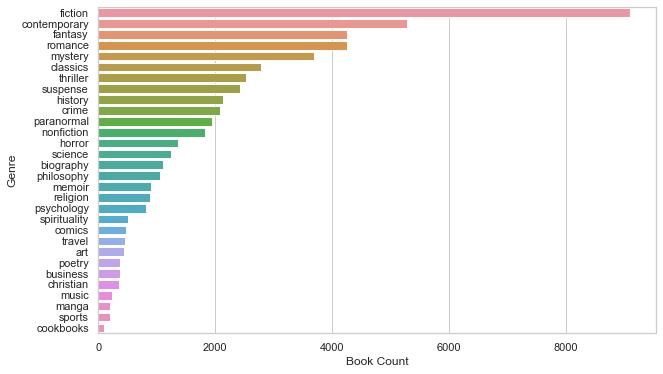

In [91]:
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(10, 6))

sns.set(style="whitegrid")
sns.barplot(x="count", y= "tag_name", data = considered_tags)

ax.set( ylabel="Genre", xlabel="Book Count")

In [92]:
#books_summary_expert_rating.head(10)
#books_summary_expert_rating.sort_values(by=['ratings/review_count','rating','work_text_reviews_count']).head(10)
#books_summary_expert_rating.sort_values(by=['work_text_reviews_count'],ascending=False).head(10)
#books_summary_expert_rating.sort_values(by=['rating'],ascending=False).head(10)
#books_summary_expert_rating.sort_values(by=['rating']).head(10)
#books_summary_expert_rating.sort_values(by=['work_ratings_count'],ascending=False).head(10)
#books_summary_expert_rating.sort_values(by=['deviation'],ascending=True).head(10)
books_summary_expert_rating.sort_values(by=['average_rating'],ascending=True).tail(10)

,book_id,title,authors,original_publication_year,average_rating,work_ratings_count,work_text_reviews_count,ratings_5,rating,deviation,ratings/review_count,5_star_%
6919,6920,The Indispensable Calvin and Hobbes,Bill Watterson,1992.0,4.73,16911,325,13195,4.77,3.64e-02,52.03,0.78
3752,3753,"Harry Potter Collection (Harry Potter, #1-6)",J.K. Rowling,2005.0,4.73,26274,882,21048,4.70,-3.04e-02,29.79,0.80
6360,6361,There's Treasure Everywhere: A Calvin and Hobb...,Bill Watterson,1996.0,4.74,17285,149,13692,4.76,2.05e-02,116.01,0.79
421,422,"Harry Potter Boxset (Harry Potter, #1-7)",J.K. Rowling,1998.0,4.74,204125,6508,164049,4.66,-8.05e-02,31.37,0.80
4482,4483,It's a Magical World: A Calvin and Hobbes Coll...,Bill Watterson,1996.0,4.75,23429,264,18749,4.75,-2.60e-03,88.75,0.80
8853,8854,Mark of the Lion Trilogy,Francine Rivers,1993.0,4.76,9547,731,7773,4.59,-1.75e-01,13.06,0.81
7946,7947,ESV Study Bible,"Anonymous, Lane T. Dennis, Wayne A. Grudem",2002.0,4.76,10784,262,9077,4.82,5.82e-02,41.16,0.84
861,862,"Words of Radiance (The Stormlight Archive, #2)",Brandon Sanderson,2014.0,4.77,108176,7261,86693,4.70,-6.72e-02,14.90,0.80
3274,3275,"Harry Potter Boxed Set, Books 1-5 (Harry Potte...","J.K. Rowling, Mary GrandPré",2003.0,4.77,33424,156,28210,4.74,-3.32e-02,214.26,0.84
3627,3628,The Complete Calvin and Hobbes,Bill Watterson,2005.0,4.82,29968,861,25884,4.83,9.88e-03,34.81,0.86


The following compilation of authors and books is recommended by Mortimer Adler's reading list from the book 'How to Read'. 
Several Authors are not in dataset as they may not have enough ratings/reviews. Mostly Scientific Works.
Furthermore, several classics from eastern civilization are absent and the list should be extended.

In [112]:
#Classics in dataset recommended by Mortimer Adler's reading list. 
#Authors

authors = ['Homer', 'Aeschylus', 'Sophocles', 'Herodotus', 'Euripides', 'Thucydides', 
           'Hippocrates', 'Aristophanes', 'Plato', 'Aristotle', 'Epicurus', 'Euclid', 'Archimedes', 'Perga', 'Cicero', 
           'Lucretius', 'Virgil', 'Horace', 'Livy', 'Ovid', 'Plutarch', 'Tacitus', 'Gerasa', 'Epictetus', 'Ptolemy', 
           'Lucian', 'Aurelius', 'Galen', 'Plotinus', 'Augustine', 'Aquinas', 'Alighieri', 'Chaucer', 'Vinci', 
           'Machiavelli', 'Erasmus', 'Copernicus', 'More', 'Luther', 'Rabelais', 'Calvin', 'Montaigne', 'Gilbert', 
           'Cervantes', 'Spenser', 'Bacon', 'Shakespeare', 'Galilei', 'Kepler', 'Harvey', 'Hobbes', 'Descartes', 'Milton', 
           'Molière', 'Pascal', 'Huygens', 'Spinoza', 'Locke', 'Racine', 'Newton', 'Leibniz', 'Defoe', 'Swift', 
           'Congreve', 'Berkeley', 'Pope', 'Montesquieu', 'Voltaire', 'Fielding', 'Johnson', 'Hume', 'Rousseau', 
           'Sterne', 'Smith', 'Kant', 'Gibbon', 'Boswell', 'Lavoisier', 'Madison', 'Bentham', 'Goethe', 'Fourier', 
           'Hegel', 'Wordsworth', 'Coleridge', 'Austen', 'Clausewitz', 'Stendhal', 'Byron', 'Schopenhauer', 'Faraday', 
           'Lyell', 'Comte', 'Balzac', 'Emerson', 'Hawthorne', 'Tocqueville', 'Mill', 'Darwin', 'Dickens', 'Bernard', 
           'Thoreau', 'Marx', 'Eliot', 'Melville', 'Dostoyevsky', 'Flaubert', 'Ibsen', 'Tolstoy', 'Twain', 
           'James', 'James', 'Nietzsche', 'Poincare', 'Freud', 'Shaw', 'Planck', 'Bergson', 'Dewey', 'Whitehead', 
           'Santayana', 'Lenin', 'Proust', 'Russell', 'Mann', 'Einstein', 'Joyce', 'Maritain', 'Kafka', 'Toynbee', 
           'Sartre', 'Solzhenitsyn']

classics = pd.read_csv( 'data/classic.csv' )
rated_classic_authors = classics['authors'].tolist()
classics.describe()
classics.head()

,book_id,title,authors,original_publication_year,average_rating,work_ratings_count,work_text_reviews_count,rating,deviation
0,10,Pride and Prejudice,Jane Austen,1813.0,4.24,2191465,49152,4.19,-0.05
1,29,Romeo and Juliet,"William Shakespeare, Robert Jackson",1595.0,3.73,1672889,14778,3.71,-0.02
2,58,The Adventures of Huckleberry Finn,"Mark Twain, John Seelye, Guy Cardwell",1884.0,3.80,1001491,12448,3.83,0.03
3,76,Sense and Sensibility,"Jane Austen, Tony Tanner, Ros Ballaster",1811.0,4.06,779382,11526,3.99,-0.07
4,79,The Odyssey,"Homer, Robert Fagles, E.V. Rieu, Frédéric Mugl...",-720.0,3.73,710757,8101,3.72,-0.01


In [94]:
unrated_classic_authors = []
#print (rated_classic_authors)

for author in authors:
    if not any(author in s for s in rated_classic_authors):
        unrated_classic_authors.append(author)

print ('number of unrated classic authors in data set: '+ repr(len(unrated_classic_authors)))
print (unrated_classic_authors)

number of unrated classic authors in data set: 56
['Hippocrates', 'Epicurus', 'Euclid', 'Archimedes', 'Perga', 'Cicero', 'Lucretius', 'Horace', 'Livy', 'Plutarch', 'Tacitus', 'Gerasa', 'Epictetus', 'Ptolemy', 'Lucian', 'Galen', 'Plotinus', 'Aquinas', 'Erasmus', 'Copernicus', 'Luther', 'Calvin', 'Montaigne', 'Bacon', 'Galilei', 'Kepler', 'Harvey', 'Pascal', 'Huygens', 'Racine', 'Newton', 'Leibniz', 'Congreve', 'Berkeley', 'Pope', 'Montesquieu', 'Boswell', 'Lavoisier', 'Bentham', 'Fourier', 'Wordsworth', 'Clausewitz', 'Schopenhauer', 'Faraday', 'Lyell', 'Comte', 'Dostoyevsky', 'Poincare', 'Planck', 'Bergson', 'Dewey', 'Whitehead', 'Santayana', 'Lenin', 'Maritain', 'Toynbee']


In [95]:
classics["ratings/review_count"] = classics["work_ratings_count"]/classics["work_text_reviews_count"]

classics.sort_values(by=['ratings/review_count','rating','work_text_reviews_count'], ascending=False).head(10)

,book_id,title,authors,original_publication_year,average_rating,work_ratings_count,work_text_reviews_count,rating,deviation,ratings/review_count
90,3041,Leonardo's Notebooks,"Leonardo da Vinci, H. Anna Suh",1519.0,3.97,27803,114,4.07,0.10,243.89
178,8149,Pygmalion & My Fair Lady,"George Bernard Shaw, Alan Jay Lerner",1956.0,4.24,13460,63,4.29,0.05,213.65
188,8899,Selected Poems,"George Gordon Byron, Peter J. Manning, Susan J...",1848.0,4.05,11313,57,3.98,-0.07,198.47
198,9605,Essays and Poems,"Ralph Waldo Emerson, Peter Norberg",1856.0,3.98,11967,62,3.88,-0.10,193.02
75,2168,"A Christmas Carol, The Chimes and The Cricket ...","Charles Dickens, Katharine Kroeber Wiley",1843.0,4.11,48945,263,4.10,-0.01,186.10
173,7990,An Essay Concerning Human Understanding,John Locke,1689.0,3.82,11957,92,3.76,-0.06,129.97
1,29,Romeo and Juliet,"William Shakespeare, Robert Jackson",1595.0,3.73,1672889,14778,3.71,-0.02,113.20
165,7428,Two Treatises of Government,"John Locke, Peter Laslett, Raymond Geuss",1689.0,3.81,13378,120,3.78,-0.03,111.48
60,1492,The Complete Poems of Emily Dickinson,"Emily Dickinson, Thomas H. Johnson",1890.0,4.21,62149,614,4.17,-0.04,101.22
74,2142,The Iliad/The Odyssey,"Homer, Robert Fagles, Bernard Knox",-762.0,4.03,51098,537,3.95,-0.08,95.15


# Visualization
Try out diffent plots for comparing the control set of all books and books from all classic authors.

It shows that
- 56 of 129 classic authors are not in dataset of books. The dataset can be scraped for 2020.
- The classic books have average rating(3.82) less than control set (3.90). Note: This is for average rating from users of rate frequently. The average rating from all users for classics (3.88) is less than control set (4.0)
- The users who rate frequently tend to give lower ratings.
- Out of 10,000 books in control set only 212 are written by classic authors.
- The standard deviation for classics(.21) is less than control set(.29)
- For classics, one review has been given for every 44 ratings. Whereas for control set, one review has been given for every 34 ratings.

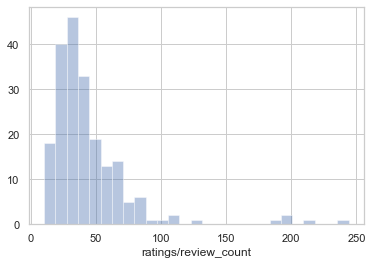

In [111]:
#t.violinplot(column=['average_rating', 'rating'])
sns.distplot(classics["ratings/review_count"], kde=False,rug=False)

#sns.distplot(classics["ratings/review_count"],kde=False, rug=False,color="red")
#t["rating"].plot.kde()
#import matplotlib.pyplot as plt
#fig = plt.figure()
#for frame in [t,books_summary_expert_rating]:
#    plt.hist(frame['average_rating'], normed=True, alpha=0.5)

#plt.show()

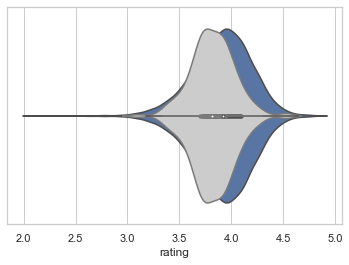

In [97]:
#sns.stripplot(x=books_summary_expert_rating["rating"])
#sns.stripplot(x=classics["average_rating"],color=".8")
sns.violinplot(x=books_summary_expert_rating["rating"])
sns.violinplot(x=classics["rating"],color=".8")

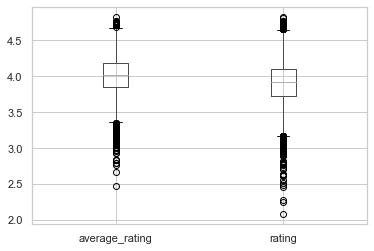

In [98]:
books_summary_expert_rating.boxplot(column=['average_rating', 'rating'])

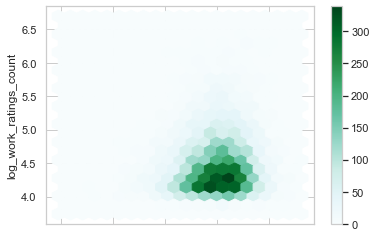

In [99]:
books_summary_expert_rating['log_work_ratings_count'] = np.log10(books_summary_expert_rating['work_ratings_count'])
books_summary_expert_rating.plot.hexbin(x='average_rating',
                      y='log_work_ratings_count', gridsize=20)

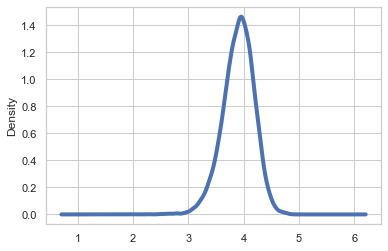

In [100]:
books_summary_expert_rating.rating.plot.density(linewidth=4)

In [101]:
def ann(row):
    ind = row[0]
    r = row[1]
    plt.gca().annotate(r["title"], xy=(r["rating"], r["average_rating"]), 
            xytext=(2,2) , textcoords ="offset points", )

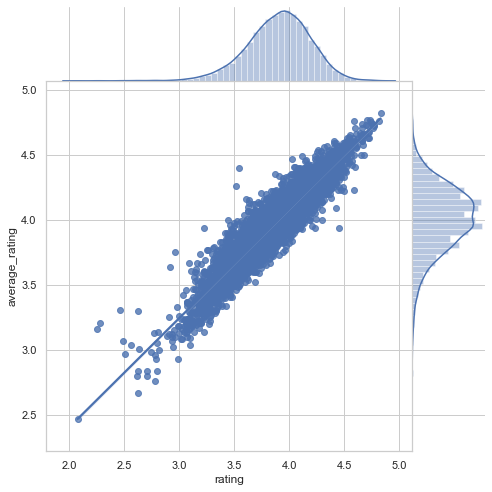

In [102]:
x1 = books_summary_expert_rating['rating']
x2 = books_summary_expert_rating['average_rating']
sns.jointplot(x1, x2, kind="reg", height=7, space=0)

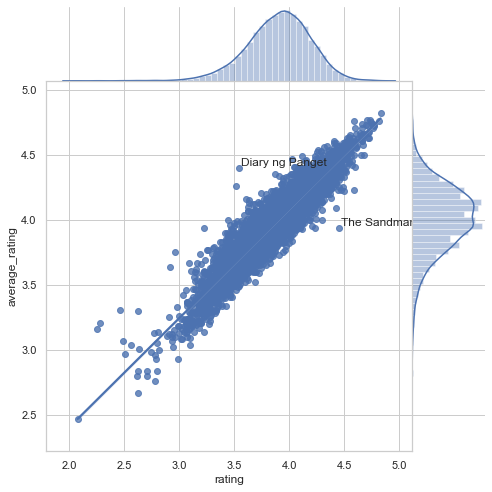

In [103]:
x1 = books_summary_expert_rating['rating']
x2 = books_summary_expert_rating['average_rating']
g = sns.jointplot(x1, x2, kind="reg", height=7, space=0)

#indices to annotate
head = books_summary_expert_rating[books_summary_expert_rating.rating > 3].sort_values(by=['deviation'], ascending=[False]).head(1)
tail = books_summary_expert_rating[books_summary_expert_rating.rating > 3].sort_values(by=['deviation'], ascending=[False]).tail(1)

for row in head.iterrows():
    ann(row)
for row in tail.iterrows():
    ann(row)

plt.show()



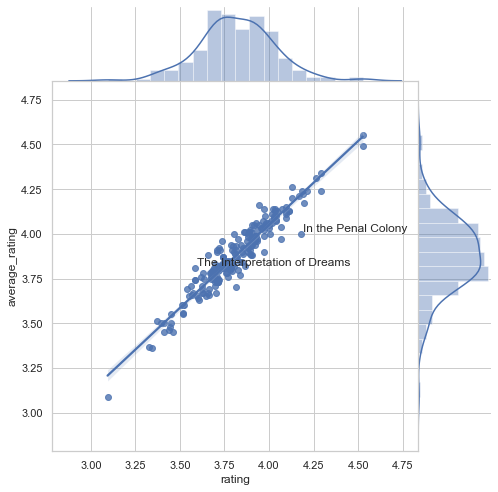

In [104]:
x1 = classics['rating']
x2 = classics['average_rating']
g = sns.jointplot(x1, x2, kind="reg", height=7, space=0)

#indices to annotate
head = classics[classics.rating > 3].sort_values(by=['deviation'], ascending=[False]).head(1)
tail = classics[classics.rating > 3].sort_values(by=['deviation'], ascending=[False]).tail(1)

for row in head.iterrows():
    ann(row)
for row in tail.iterrows():
    ann(row)

plt.show()

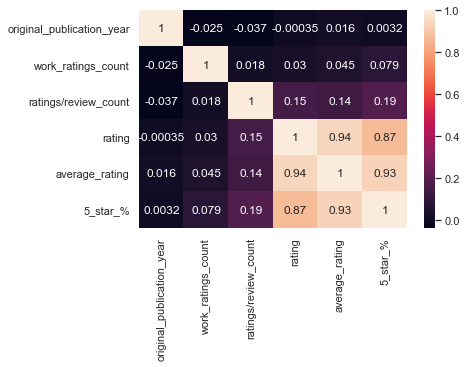

In [105]:
df_books = books_summary_expert_rating[['original_publication_year','work_ratings_count',
                                        'ratings/review_count',
                                        'rating','average_rating','5_star_%']]

sns.heatmap(df_books.corr(), annot = True)


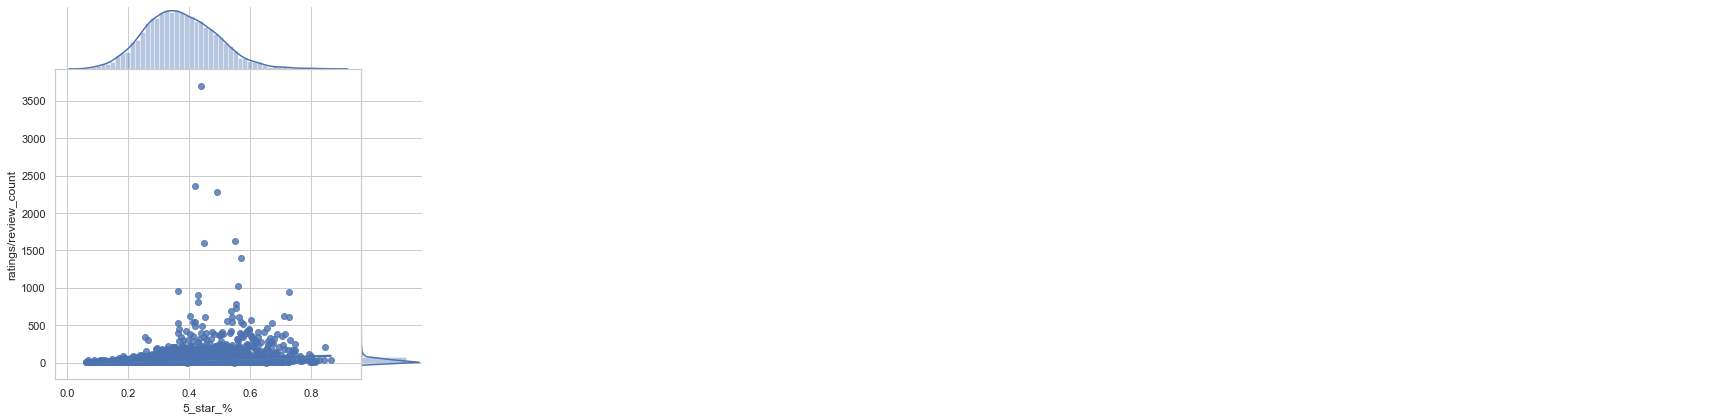

In [106]:
x1 = books_summary_expert_rating['5_star_%']
x2 = books_summary_expert_rating['ratings/review_count']
g = sns.jointplot(x1, x2, kind="reg",  space=0)

#indices to annotate
head = books_summary_expert_rating[books_summary_expert_rating.rating > 3].sort_values(by=['5_star_%'], ascending=[False]).head(1)
tail = books_summary_expert_rating[books_summary_expert_rating.rating > 3].sort_values(by=['5_star_%'], ascending=[False]).tail(1)

for row in head.iterrows():
    ann(row)
for row in tail.iterrows():
    ann(row)

plt.show()
